<a href="https://colab.research.google.com/github/Aiswarya2018/task1/blob/main/smsclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [4]:
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
file_path = 'spam.csv'
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        try:
            print(f"file successfully read with encoding: {encoding}")
            break
        except UnicodeDecodeError:
            print(f"failed to read with encoding: {encoding}")
            continue
    except UnicodeDecodeError:
        pass
if 'df' in locals():
    print("csv file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

file successfully read with encoding: latin1
csv file has been successfully loaded.


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
462,spam,"UpgrdCentre Orange customer, you may now claim...",NaN,NaN,NaN
4896,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
3584,ham,Heart is empty without love.. Mind is empty wi...,NaN,NaN,NaN
5193,ham,"It's wylie, you in tampa or sarasota?",NaN,NaN,NaN
1717,spam,WOW! The Boys R Back. TAKE THAT 2007 UK Tour. ...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.rename(columns={'v1' : 'target', 'v2' : 'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
1806,spam,Todays Voda numbers ending 1225 are selected t...,NaN,NaN,NaN
2052,spam,Call 09094100151 to use ur mins! Calls cast 10...,NaN,NaN,NaN
560,ham,Hi msg me:)i'm in office..,NaN,NaN,NaN
2141,ham,Alright took the morphine. Back in yo.,NaN,NaN,NaN
3310,ham,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...,NaN,NaN,NaN


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 5)

In [17]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [18]:
df.sample(5)

,target,text
62,0,Its a part of checking IQ
3037,0,You are not bothering me but you have to trust...
5480,0,Have you seen who's back at Holby?!
4922,0,Oh yah... We never cancel leh... Haha
674,0,"I've got &lt;#&gt; , any way I could pick up?"


In [19]:
df.shape

(5169, 2)

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [21]:
import nltk

In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

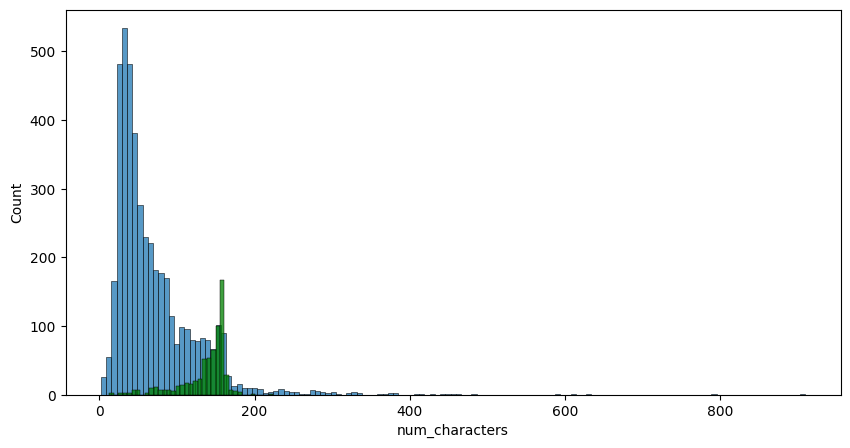

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='green')

In [55]:
x=np.array(df["text"])
y=np.array(df["target"])

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [57]:
print(x.shape,x_train.shape,x_test.shape)

(5169, 8672) (4135, 8672) (1034, 8672)


In [67]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
if not isinstance(x_train,np.ndarray):
  x_train=x_train.toarray()
clf.fit(x_train, y_train)

GaussianNB()

In [68]:
sample=input("Enter a message: ")
data=cv.transform([sample]).toarray()
print(clf.predict(data))

Enter a message: Ok lar... Joking wif u oni...
[0]


In [70]:
x_test_dense = x_test.toarray()
clf.score(x_test_dense,y_test)

0.90715667311412